# 1. Introduction

<table class="tfo-notebook-buttons" align="left">
  
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/pantelis/PRML/blob/master/notebooks/ch01_Introduction.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# You need to adjust the directory names below for your own account
# e.g. you may elect to create ms-notebooks dir or not

# Execute this cell once

# 1. Download the repo and set it as the current directory
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks
!git clone https://github.com/pantelis/PRML
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML

# 2. install the project/module
!python setup.py install



/content/drive/My Drive/Colab Notebooks/ml-notebooks
fatal: destination path 'PRML' already exists and is not an empty directory.
/content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML
Traceback (most recent call last):
  File "setup.py", line 11, in <module>
    packages=find_packages(exclude=["test", "test.*"]),
  File "/usr/local/lib/python3.6/dist-packages/setuptools/__init__.py", line 66, in find
    cls._build_filter(*include)))
  File "/usr/local/lib/python3.6/dist-packages/setuptools/__init__.py", line 85, in _find_packages_iter
    if ('.' in dir or not cls._looks_like_package(full_path)):
  File "/usr/local/lib/python3.6/dist-packages/setuptools/__init__.py", line 99, in _looks_like_package
    return os.path.isfile(os.path.join(path, '__init__.py'))
  File "/usr/lib/python3.6/genericpath.py", line 30, in isfile
    st = os.stat(path)
KeyboardInterrupt


In [3]:
# 3. Add the project directory to the path
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML
import os, sys
sys.path.append(os.getcwd())

/content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML


In [4]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

np.random.seed(1234)

## 1.1. Example: Polynomial Curve Fitting

The cell below defines $p_{data}(y|x)$ and generates the $\hat p_{data}(y|x)$

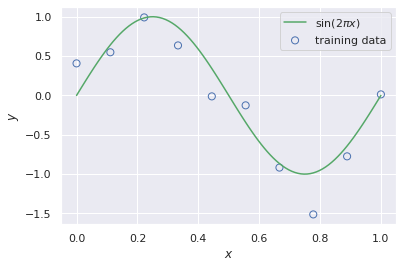

In [13]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size) # p(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape) 
    return x, y

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

**Loss Function**:
The RMSE function or the Root Mean Squared Error function serves as a means to find the difference between data and the ideal line graph. The function finds the sum of the squares of the previously mention data point and the sine line. The function finds the distance between the 2 for every data point. The distance is the deviation or error. The smaller the absolute value is for the RMSE function the more accurate the points are to the model.



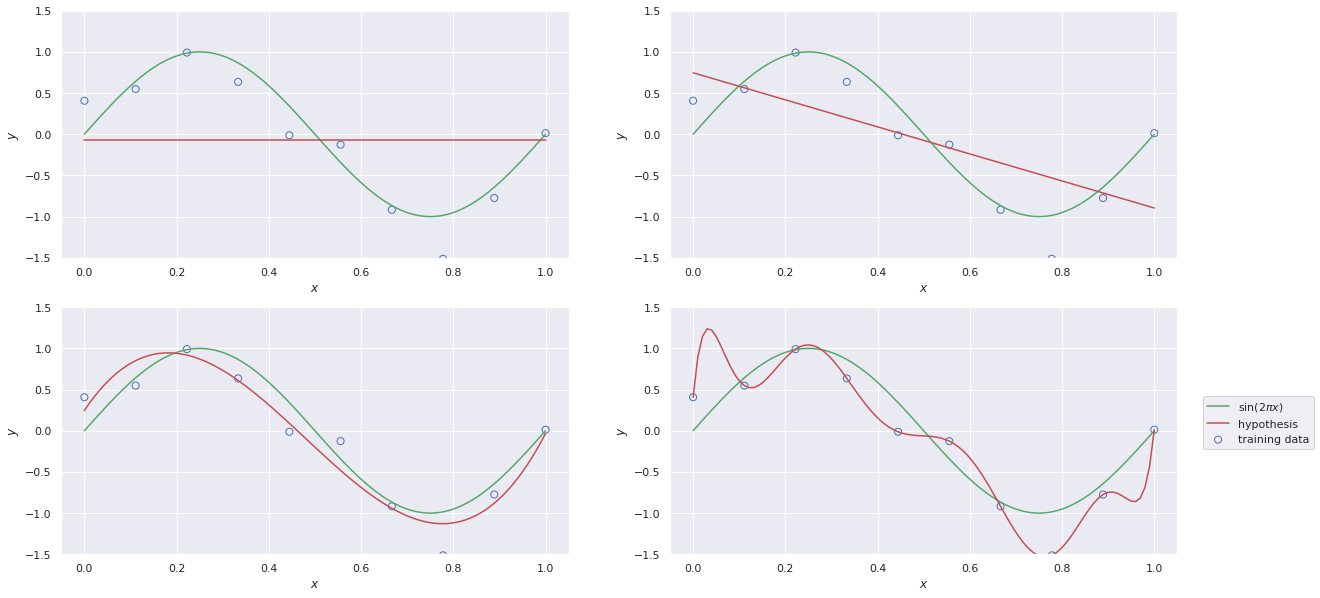

In [14]:
plt.subplots(figsize=(20, 10))
for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="hypothesis")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
    plt.xlabel('$x$')
    plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

**Model complexity**: The graph gives a line in which M defines how weighted the hypothical(red) line is. M=9 in an attempt to match as many data points as possible results in a more unfitting exaggarated line compared to M=3 which has to compensate less as it does not try to fit every data point giving a smoother yet accurate hypthetical line.

The w for M=1:
[ 0.74619094 -1.64164415]
The w for M=3:
[  0.24662743   8.34471972 -28.32162073  19.69702659]
The w for M=6:
[   0.38258726    3.68315255  -13.39318117   49.03511991 -159.52362934
  195.34970377  -75.49430941]
The w for M=9:
[ 4.07213955e-01  6.18259687e+01 -1.52565800e+03  1.49303137e+04
 -7.43987896e+04  2.10125019e+05 -3.50801359e+05  3.42797894e+05
 -1.81153773e+05  3.99641330e+04]


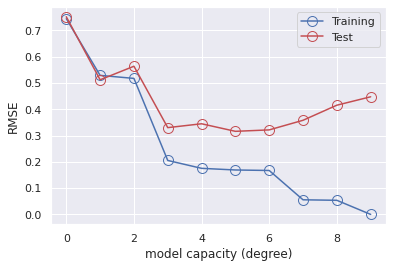

In [40]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    if i == 1 or i == 3 or i == 6 or i == 9:
      w =(np.linalg.pinv(X_train) @ y_train)
      print("The w for M=" + str(i) + ":")
      print(w)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

  


#### Regularization

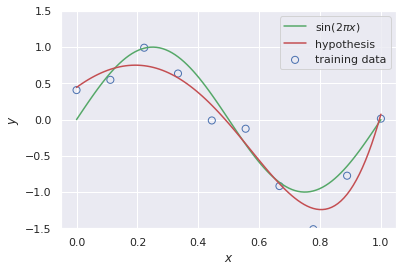

In [16]:
feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

#y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="hypothesis")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.show()

**Regularization**
Because there are so many w's involved the hypothesis line starts to get jumbled try to touch all the points. What regularization does is it tries to measure the importance of each data point and gives the hypothesis line the ability to smooth out given all the weighted points.

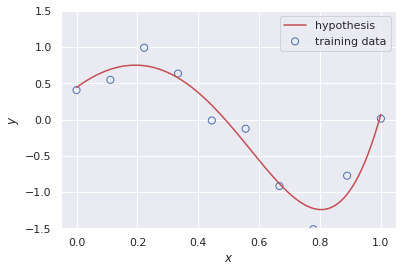

In [44]:
feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

#y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y, c="r", label="hypothesis")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.show()

